In [2]:
"""
Author: JiaHui (Jeffrey) Lu
ID: 25944800
"""
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# define parameters
beta = 0.0002   # birth rate
delta = 0.0002  # death rate
f = 0.0005      # infection rate
alpha = 0.1     # recover rate

In [8]:
def compute_probability(beta, delta, f, alpha, s, i, r):
    ans = np.array([beta*(s+i+r),
                    delta*s,
                    delta*i,
                    delta*r,
                    f*s*i,
                    alpha *i])
    ans = ans/sum(ans)
    return ans


compute_probability(beta, delta, f, alpha, S[-1], I[-1], R[-1])

array([  3.94880368e-04,   3.56881231e-05,   3.49986073e-04,
         9.20617188e-06,   8.24217203e-01,   1.74993037e-01])

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


9913 9913


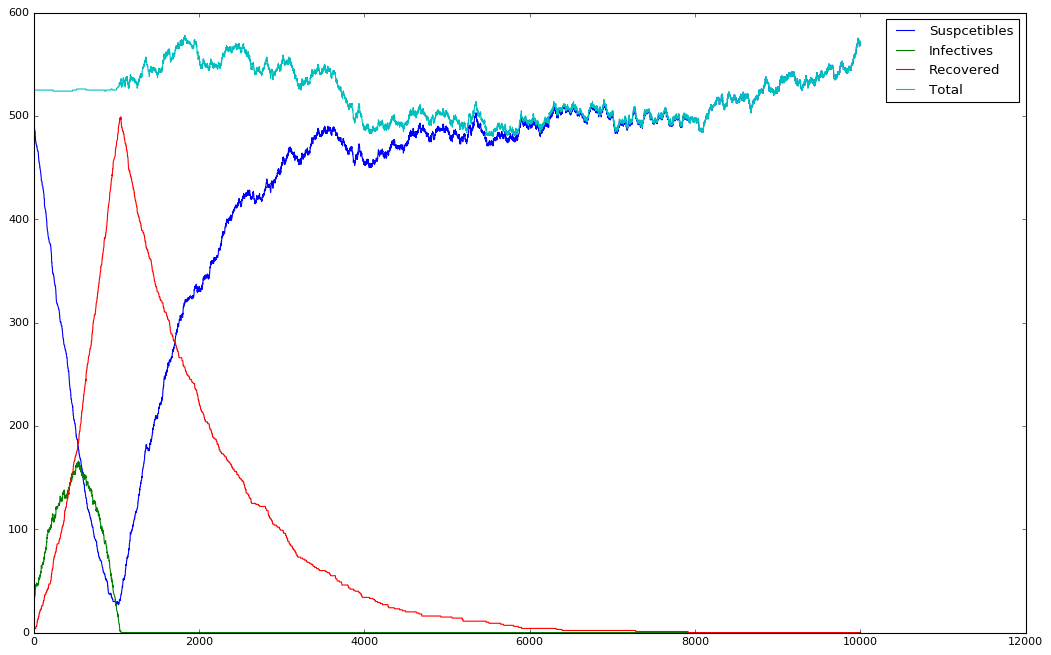

In [9]:
S = [500]
I = [25]
R = [0]
total = [S[-1] + I[-1] + R[-1]]
t = 0
time_list = [0]
while t < 10000:
    ps = compute_probability(beta, delta, f, alpha, S[-1], I[-1], R[-1])
    t_list = -np.log(np.random.uniform(0, 1, 6))/ps  # WHY TAKE LOG AT THIS STEP!?
    action_index = t_list.argmin()
    t += t_list[action_index]
    time_list.append(t)
    if action_index == 0:
        S.append(S[-1] + 1)
        I.append(I[-1])
        R.append(R[-1])
    elif action_index == 1:
        S.append(S[-1] - 1)
        I.append(I[-1])
        R.append(R[-1])
    elif action_index == 2:
        S.append(S[-1])
        I.append(I[-1]-1)
        R.append(R[-1])
    elif action_index == 3:
        S.append(S[-1])
        I.append(I[-1])
        R.append(R[-1]-1)
    elif action_index == 4:
        S.append(S[-1]-1)
        I.append(I[-1]+1)
        R.append(R[-1])
    elif action_index == 5:
        S.append(S[-1])
        I.append(I[-1]-1)
        R.append(R[-1]+1)
    total.append(S[-1] + I[-1] + R[-1])

fig=plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
print(len(time_list), len(S))
plt.plot(time_list, S, label="Suspcetibles")
plt.plot(time_list, I, label="Infectives")
plt.plot(time_list, R, label="Recovered")
plt.plot(time_list, total, label="Total")
plt.legend()
plt.show()